In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_half_hour=pd.read_csv('OERK.csv')
df_half_hour.isna().sum()

valid     0
tmpf     27
dwpf     27
relh     68
drct     29
sknt     20
alti     29
vsby     24
feel     68
dtype: int64

In [3]:
filter_df=df_half_hour
filter_df

,valid,tmpf,dwpf,relh,drct,sknt,alti,vsby,feel
0,1/1/2010 0:00,53.6,46.4,76.50,290.0,2.0,30.03,6.21,53.60
1,1/1/2010 1:00,51.8,44.6,76.34,280.0,5.0,30.03,6.21,51.80
2,1/1/2010 2:00,51.8,44.6,76.34,270.0,4.0,30.06,6.21,51.80
3,1/1/2010 3:00,50.0,44.6,81.61,290.0,3.0,30.06,6.21,50.00
4,1/1/2010 4:00,50.0,44.6,81.61,290.0,5.0,30.09,6.21,50.00
...,...,...,...,...,...,...,...,...,...
130135,10/20/2024 19:00,84.2,39.2,20.29,140.0,2.0,30.00,6.21,81.44
130136,10/20/2024 20:00,84.2,39.2,20.29,150.0,3.0,30.00,6.21,81.44
130137,10/20/2024 21:00,80.6,39.2,22.81,360.0,2.0,30.03,6.21,79.10
130138,10/20/2024 22:00,78.8,41.0,25.95,0.0,0.0,30.00,6.21,78.80


In [4]:
# Ensure the 'valid' column is in datetime format
filter_df['valid'] = pd.to_datetime(filter_df['valid'])

# Add a 'date' column for easier grouping
filter_df['date'] = filter_df['valid'].dt.date

# Find rows with the maximum temperature for each day
daily_max_temp = filter_df.loc[filter_df.groupby('date')['tmpf'].idxmax()].reset_index(drop=True)

# Inspect the result
daily_max_temp.drop(columns=['valid'],inplace=True)
daily_max_temp


,tmpf,dwpf,relh,drct,sknt,alti,vsby,feel,date
0,68.0,39.2,34.80,320.0,18.0,30.09,6.21,68.00,2010-01-01
1,69.8,33.8,26.43,330.0,6.0,30.18,6.21,69.80,2010-01-02
2,75.2,42.8,31.34,170.0,3.0,30.15,6.21,73.89,2010-01-03
3,77.0,24.8,14.37,170.0,6.0,30.12,6.21,75.08,2010-01-04
4,75.2,35.6,23.66,0.0,0.0,30.06,6.21,73.53,2010-01-05
...,...,...,...,...,...,...,...,...,...
5401,98.6,28.4,8.40,40.0,5.0,29.94,6.21,92.25,2024-10-16
5402,96.8,21.2,6.57,150.0,5.0,29.91,6.21,90.11,2024-10-17
5403,96.8,24.8,7.65,200.0,3.0,29.88,6.21,90.40,2024-10-18
5404,98.6,30.2,9.04,80.0,4.0,29.91,6.21,92.46,2024-10-19


In [5]:
daily_max_temp['temp_c'] = (daily_max_temp['tmpf'] - 32) * 5/9

# Drop the old column if needed
daily_max_temp.drop(columns=['tmpf'], inplace=True)

daily_max_temp

,dwpf,relh,drct,sknt,alti,vsby,feel,date,temp_c
0,39.2,34.80,320.0,18.0,30.09,6.21,68.00,2010-01-01,20.0
1,33.8,26.43,330.0,6.0,30.18,6.21,69.80,2010-01-02,21.0
2,42.8,31.34,170.0,3.0,30.15,6.21,73.89,2010-01-03,24.0
3,24.8,14.37,170.0,6.0,30.12,6.21,75.08,2010-01-04,25.0
4,35.6,23.66,0.0,0.0,30.06,6.21,73.53,2010-01-05,24.0
...,...,...,...,...,...,...,...,...,...
5401,28.4,8.40,40.0,5.0,29.94,6.21,92.25,2024-10-16,37.0
5402,21.2,6.57,150.0,5.0,29.91,6.21,90.11,2024-10-17,36.0
5403,24.8,7.65,200.0,3.0,29.88,6.21,90.40,2024-10-18,36.0
5404,30.2,9.04,80.0,4.0,29.91,6.21,92.46,2024-10-19,37.0


In [6]:
percentile_90 = np.percentile(daily_max_temp['temp_c'], 90)
print(f"90th Percentile of max_temp_c: {percentile_90}")
daily_max_temp

90th Percentile of max_temp_c: 44.0


,dwpf,relh,drct,sknt,alti,vsby,feel,date,temp_c
0,39.2,34.80,320.0,18.0,30.09,6.21,68.00,2010-01-01,20.0
1,33.8,26.43,330.0,6.0,30.18,6.21,69.80,2010-01-02,21.0
2,42.8,31.34,170.0,3.0,30.15,6.21,73.89,2010-01-03,24.0
3,24.8,14.37,170.0,6.0,30.12,6.21,75.08,2010-01-04,25.0
4,35.6,23.66,0.0,0.0,30.06,6.21,73.53,2010-01-05,24.0
...,...,...,...,...,...,...,...,...,...
5401,28.4,8.40,40.0,5.0,29.94,6.21,92.25,2024-10-16,37.0
5402,21.2,6.57,150.0,5.0,29.91,6.21,90.11,2024-10-17,36.0
5403,24.8,7.65,200.0,3.0,29.88,6.21,90.40,2024-10-18,36.0
5404,30.2,9.04,80.0,4.0,29.91,6.21,92.46,2024-10-19,37.0


In [7]:
daily_max_temp.isna().sum()

dwpf      0
relh      2
drct      0
sknt      0
alti      0
vsby      0
feel      2
date      0
temp_c    0
dtype: int64

In [8]:
daily_max_temp = daily_max_temp.ffill() 
daily_max_temp.isna().sum()

dwpf      0
relh      0
drct      0
sknt      0
alti      0
vsby      0
feel      0
date      0
temp_c    0
dtype: int64

In [9]:
daily_max_temp['date'] = pd.to_datetime(daily_max_temp['date'])

daily_max_temp = daily_max_temp[(daily_max_temp['date'] >= pd.to_datetime('2010-01-01')) & (daily_max_temp['date'] <= pd.to_datetime('2024-10-21'))]

daily_max_temp

,dwpf,relh,drct,sknt,alti,vsby,feel,date,temp_c
0,39.2,34.80,320.0,18.0,30.09,6.21,68.00,2010-01-01,20.0
1,33.8,26.43,330.0,6.0,30.18,6.21,69.80,2010-01-02,21.0
2,42.8,31.34,170.0,3.0,30.15,6.21,73.89,2010-01-03,24.0
3,24.8,14.37,170.0,6.0,30.12,6.21,75.08,2010-01-04,25.0
4,35.6,23.66,0.0,0.0,30.06,6.21,73.53,2010-01-05,24.0
...,...,...,...,...,...,...,...,...,...
5401,28.4,8.40,40.0,5.0,29.94,6.21,92.25,2024-10-16,37.0
5402,21.2,6.57,150.0,5.0,29.91,6.21,90.11,2024-10-17,36.0
5403,24.8,7.65,200.0,3.0,29.88,6.21,90.40,2024-10-18,36.0
5404,30.2,9.04,80.0,4.0,29.91,6.21,92.46,2024-10-19,37.0


In [10]:
df=daily_max_temp

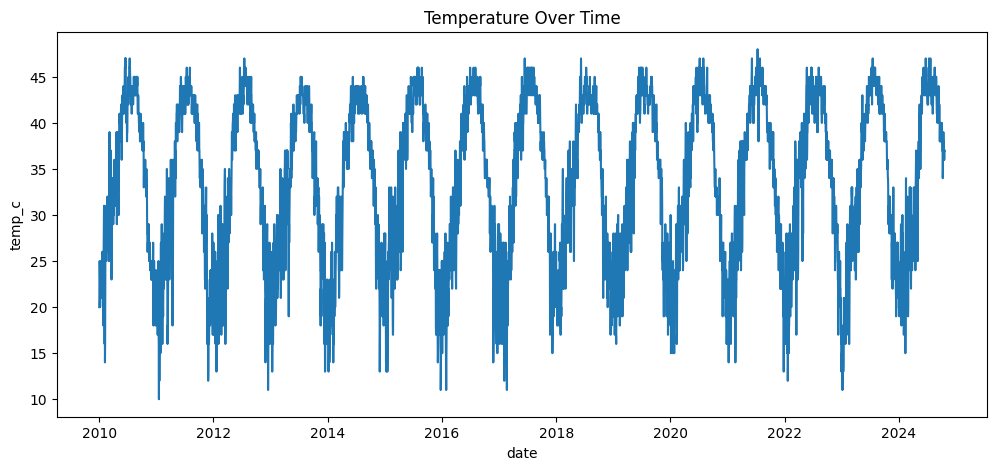

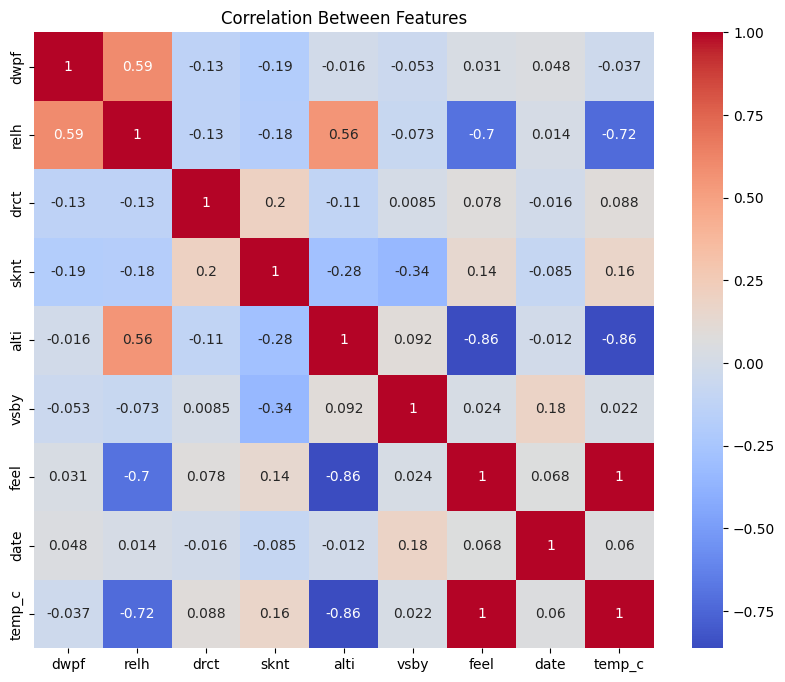

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temperature trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='temp_c', data=df)
plt.title("Temperature Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [12]:
# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Create useful time columns
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour

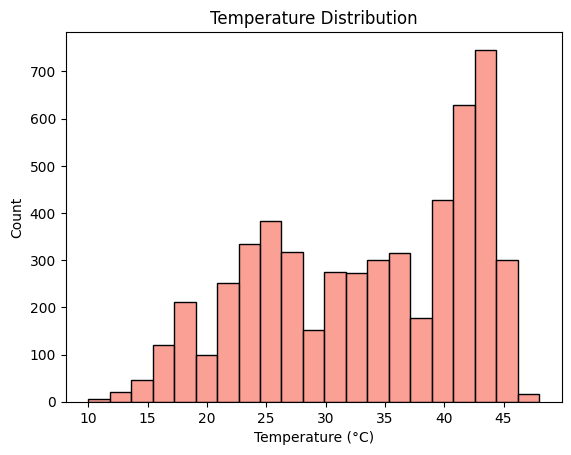

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is your DataFrame and 'temp_c' is the temperature column
sns.histplot(data=df, x='temp_c', kde=False, color='salmon', edgecolor='black')

plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_21568\2633976979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')


Text(0, 0.5, 'Temperature (°C)')

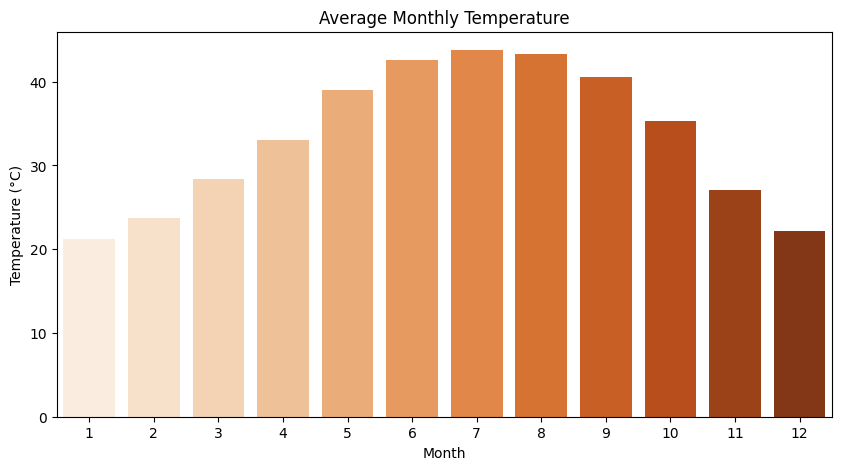

In [14]:
monthly_temp = df.groupby('month')['temp_c'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='temp_c', data=monthly_temp, palette='Oranges')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")


Text(0.5, 1.0, 'Average Maximum Temperature (°C) Month')

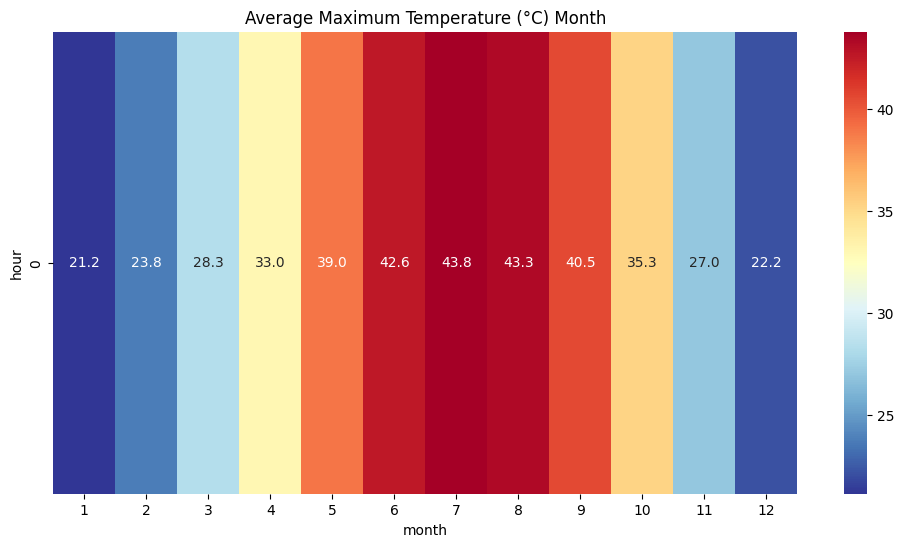

In [15]:
pivot_table = df.pivot_table(index='hour', columns='month', values='temp_c', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="RdYlBu_r", annot=True, fmt=".1f")
plt.title("Average Maximum Temperature (°C) Month")

Number of days with large temperature change (> 5°C): 291


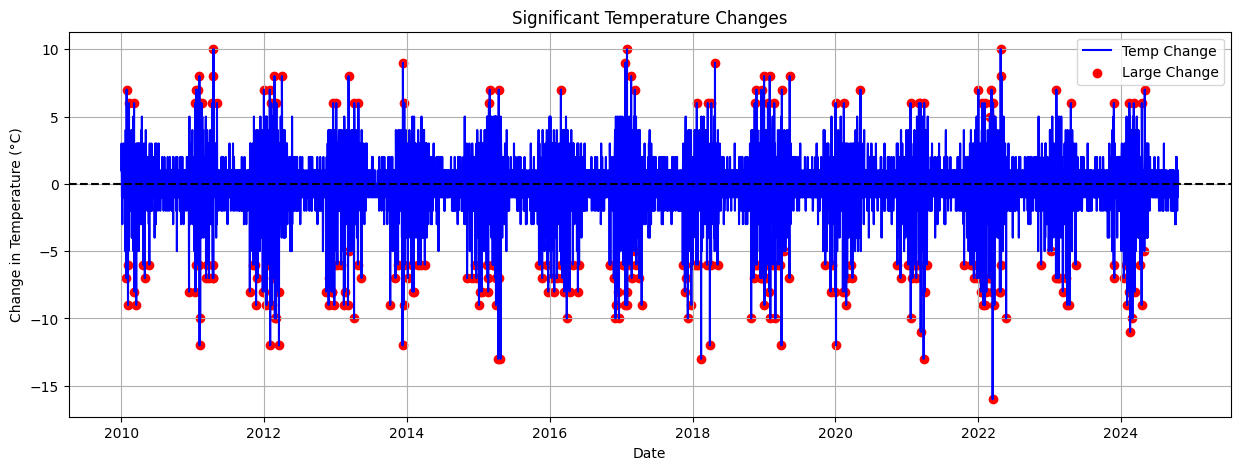

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily temperature change
df['temp_change'] = df['temp_c'].diff()

# Define threshold, e.g., >5°C change
threshold = 5

# Filter days with large absolute temperature change
large_change = df[np.abs(df['temp_change']) > threshold]

# Print number of large change days
print("Number of days with large temperature change (> 5°C):", len(large_change))

# Plotting
plt.figure(figsize=(15, 5))
plt.plot(df['date'], df['temp_change'], label="Temp Change", color='blue')
plt.scatter(large_change['date'], large_change['temp_change'], color='red', label='Large Change')
plt.axhline(0, color='black', linestyle='--')
plt.title("Significant Temperature Changes")
plt.xlabel("Date")
plt.ylabel("Change in Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
